# Preliminary Exploration
Author: dd3f


###  Description

Here is reported a preliminary exploration of the files provided as data.
A detailed description of the file can be found in [ESA kelvins repository, data page](https://kelvins.esa.int/mars-express-power-challenge/data/)

At the moment the following type of files have been analyzed (sorted by appearence):

- **EVTF files** - more events
- **Power files** 
- **LTDATA files** -  long term data
- **DMOP files** - Detailed Mission Operations Plan
- **FTL**: Flight dynamics TimeLine with spacecraft pointing events

missing

- SAAF: Solar Aspect Angles


In [1]:
import os
import glob
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib

#matplotlib.style.use('classic')
print(plt.style.available)

['seaborn-dark-palette', 'ggplot', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-talk', 'classic', 'dark_background', 'seaborn-bright', 'seaborn-muted', 'seaborn-colorblind', 'bmh', 'seaborn-dark', 'seaborn-deep', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-pastel', 'seaborn-darkgrid', 'grayscale', 'seaborn-paper', 'seaborn-notebook', 'seaborn-poster']


In [2]:
dir_raw_data = '../raw_data/mars-express-power-3years/'
dir_data = '../data/'

os.listdir(dir_raw_data + 'train_set/')

['context--2012-05-27_2014-04-14--ltdata.csv',
 'context--2012-05-27_2014-04-14--dmop.csv',
 'context--2008-08-22_2010-07-10--saaf.csv',
 'power--2008-08-22_2010-07-10.csv',
 'context--2010-07-10_2012-05-27--saaf.csv',
 'context--2012-05-27_2014-04-14--evtf.csv',
 'context--2012-05-27_2014-04-14--ftl.csv',
 'context--2010-07-10_2012-05-27--ftl.csv',
 'context--2008-08-22_2010-07-10--ltdata.csv',
 'context--2010-07-10_2012-05-27--dmop.csv',
 'context--2008-08-22_2010-07-10--evtf.csv',
 'context--2010-07-10_2012-05-27--ltdata.csv',
 'context--2012-05-27_2014-04-14--saaf.csv',
 'power--2010-07-10_2012-05-27.csv',
 'power--2012-05-27_2014-04-14.csv',
 'context--2008-08-22_2010-07-10--ftl.csv',
 'context--2008-08-22_2010-07-10--dmop.csv',
 'context--2010-07-10_2012-05-27--evtf.csv']

In [3]:
os.listdir(dir_raw_data + 'test_set/')

['context--2014-04-14_2016-03-01--ftl.csv',
 'context--2014-04-14_2016-03-01--ltdata.csv',
 'context--2014-04-14_2016-03-01--saaf.csv',
 'context--2014-04-14_2016-03-01--dmop.csv',
 'context--2014-04-14_2016-03-01--evtf.csv']

In [4]:
#Function to convert the utc timestamp to datetime - From Alex
def convert_time(df):
    df['ut_ms'] = pd.to_datetime(df['ut_ms'], unit='ms')
    return df

In [5]:
# Load all the files within a certine type
def load_train_files(str_type):
    tmp_files = glob.glob(dir_raw_data + '/train_set/'+str_type+'.csv')
    if not tmp_files:
        raise 
    else:
        tmp_list = []
        for fl in tmp_files:
            tmp_list.append(pd.read_csv(fl, iterator=True, chunksize=1000))
            print(fl + "....loaded")
        df_tmp = pd.concat(tmp_list)
    
    return df_tmp
    
# Function to convert the utc timestamp to datetime
def convert_time(df):
    df['ut_ms'] = pd.to_datetime(df['ut_ms'], unit='ms')
    return df


# Function to resample the dataframe to hourly mean
def resample_1H(df):
    df = df.set_index('ut_ms')
    df = df.resample('1H').mean()
    return df


# Function to read a csv file and resample to hourly consumption
def parse_ts(filename, dropna=True):
    df = pd.read_csv(filename)
    df = convert_time(df)
    df = resample_1H(df)
    if dropna:
        df = df.dropna()
    return df


# Function to read the ltdata files
def parse_ltdata(filename):
    df = pd.read_csv(filename)
    df = convert_time(df)
    df = df.set_index('ut_ms')
    return df    
    

# EVTF files
Quoting the description: 
>more events are listed in these event files.
 
> - **ut_ms**: unix timestamp in milliseconds
> - **description**: short description of the event

> This file contains a lot of events.It covers parts of the flight dynamics timeline present in the FTL and complements information with a lot of other events. 

> In this file you can find the following eclipse events; `*_PENUMBRA_START`, `*_PENUMBRA_END`, `*_UMBRA_START`, `*_UMBRA_END` which indicates the start and end time of different phases of the eclipse (penumbra/umbra) as you can see in the figure below.


In [6]:
evtf_files = glob.glob(dir_raw_data + '/train_set/*evtf.csv')
evtf_files2 = glob.glob(dir_raw_data + '/test_set/*evtf.csv')

In [7]:
evtf_files + evtf_files2

['../raw_data/mars-express-power-3years//train_set/context--2012-05-27_2014-04-14--evtf.csv',
 '../raw_data/mars-express-power-3years//train_set/context--2008-08-22_2010-07-10--evtf.csv',
 '../raw_data/mars-express-power-3years//train_set/context--2010-07-10_2012-05-27--evtf.csv',
 '../raw_data/mars-express-power-3years//test_set/context--2014-04-14_2016-03-01--evtf.csv']

In [8]:
evtf_list = []
for fl in (evtf_files + evtf_files2):
    evtf_list.append(pd.read_csv(fl))
    

In [9]:
df_evtf = pd.concat(evtf_list)

In [10]:
df_evtf['ut_ms'] = pd.to_datetime(df_evtf['ut_ms'], unit='ms')
df_evtf.set_index('ut_ms',inplace=True)

In [11]:
df_evtf.head()


description
ut_ms                                       
2012-05-27 00:23:15               MRB_AOS_10
2012-05-27 00:29:53  MAD_LOS_10_/_RTLT_01146
2012-05-27 00:30:21  CEB_LOS_10_/_RTLT_01146
2012-05-27 00:38:56  MAD_LOS_08_/_RTLT_01146
2012-05-27 00:56:11  MAD_LOS_05_/_RTLT_01146

### Analysis of the data

Let's see what kind of data there is in this file

In [38]:
df_evtf.shape

(329123, 2)

There are really a lot of events! Probably, these are the controls that the spaceship comunicates to the Hearth

In [39]:
(df_evtf['description'].str.contains('/')).sum()

189159

189159 / 329123 = 0.57 About a 60% are multiple commands

In [14]:
def count_commands(row):
    return len(row.split('/'))

#df_evtf['n'] = df_evtf.apply(lambda row: count_commands)

In [15]:
 df_evtf['n'] = df_evtf['description'].apply(count_commands)

In [16]:

df_evtf.head(20)

description  n
ut_ms                                                                    
2012-05-27 00:23:15                                         MRB_AOS_10  1
2012-05-27 00:29:53                            MAD_LOS_10_/_RTLT_01146  2
2012-05-27 00:30:21                            CEB_LOS_10_/_RTLT_01146  2
2012-05-27 00:38:56                            MAD_LOS_08_/_RTLT_01146  2
2012-05-27 00:56:11                            MAD_LOS_05_/_RTLT_01146  2
2012-05-27 00:56:39                            CEB_LOS_05_/_RTLT_01146  2
2012-05-27 01:03:37                            CEB_LOS_04_/_RTLT_01146  2
2012-05-27 01:41:47                          MRB_/_RANGE_06000KM_START  2
2012-05-27 01:55:15                                    4000_KM_DESCEND  1
2012-05-27 02:06:01                                 MAR_PENUMBRA_START  1
2012-05-27 02:06:22                                    MAR_UMBRA_START  1
2012-05-27 02:17:00                                    2000_KM_DESCEND  1
2012-05-27 02:19:24                                         MRB_LOS_10  1
2012-05-27 02:22:55                                         MRB_LOS_00  1
2012-05-27 02:26:04                                    1200_KM_DESCEND  1
2012-05-27 02:31:24                                     800_KM_DESCEND  1
2012-05-27 02:34:41  OCC_MARS_200KM_START_/_RA_164.49_/_DE_007.95_/...  5
2012-05-27 02:35:22                                      MAR_UMBRA_END  1
2012-05-27 02:35:34                                   MAR_PENUMBRA_END  1
2012-05-27 02:44:02  PERICENTRE_PASSAGE_10702_/_SSP_(182.94,-68.68)...  3

In [17]:
df_evtf.n.max()

5

There are at most 5 elements

In [18]:
df_evtf.n.value_counts()

2    157469
1    139964
5     22226
3      9464
Name: n, dtype: int64

That said, we can see how many commands are issued per hour

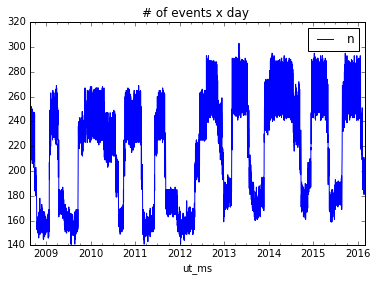

In [19]:
plt.figure()
df_evtf.resample('D').sum().plot() ; plt.title('# of events x day ')

In [ ]:
plt.figure()
df_evtf.resample('d').sum().plot() ; plt.title('# of events x day ')

Let's see wat happend when there where that spike in communications in **DMOP** data

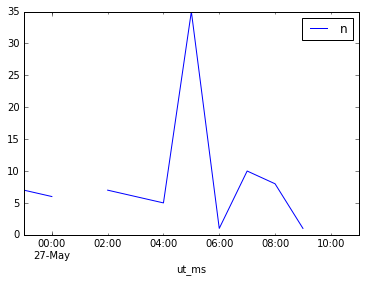

In [21]:
df_evtf['2010-05-26 23:00:00':'2010-05-27 12:00:00'].resample('h').sum().plot()

In avarege there are per hour

In [22]:
df_evtf.resample('h').sum().mean()


n    10.047056
dtype: float64

In [23]:
np.sqrt(df_evtf.resample('h').sum().var())

n    9.112433
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c210aa748>]], dtype=object)

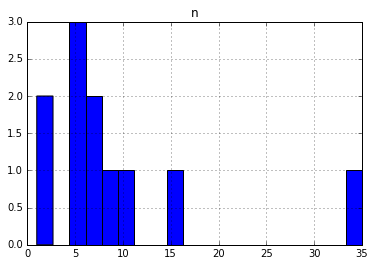

In [24]:
(df_evtf['2010-05-26 23:00:00':'2010-05-27 12:00:00'].resample('h').sum()).hist(bins=20)

So actually, there is a spike in events!

In [25]:
df_evtf['2010-05-27 04:00:00':'2010-05-27 06:00:00']

description  n
ut_ms                                                                    
2010-05-27 04:22:44                            NNO_AOS_00_/_RTLT_01515  2
2010-05-27 04:41:59                                    4000_KM_DESCEND  1
2010-05-27 04:46:48                            NNO_AOS_05_/_RTLT_01515  2
2010-05-27 05:01:36                          MRB_/_RANGE_06000KM_START  2
2010-05-27 05:03:50                                    2000_KM_DESCEND  1
2010-05-27 05:11:34  OCC_MARS_200KM_START_/_RA_147.07_/_DE_014.85_/...  5
2010-05-27 05:12:00                            NNO_AOS_10_/_RTLT_01515  2
2010-05-27 05:12:53                                    1200_KM_DESCEND  1
2010-05-27 05:12:58  OCC_MARS_START_/_RA_147.07_/_DE_014.85_/_OMP_(...  5
2010-05-27 05:18:11                                     800_KM_DESCEND  1
2010-05-27 05:30:40  PERICENTRE_PASSAGE_08194_/_SSP_(020.30,002.18)...  3
2010-05-27 05:37:24  OCC_MARS_END_/_RA_147.07_/_DE_014.85_/_OMP_(35...  5
2010-05-27 05:39:04  OCC_MARS_200KM_END_/_RA_147.08_/_DE_014.85_/_O...  5
2010-05-27 05:43:09                                      800_KM_ASCEND  1
2010-05-27 05:48:28                                     1200_KM_ASCEND  1
2010-05-27 05:56:34                            MRB_/_RANGE_06000KM_END  2
2010-05-27 05:57:32                                     2000_KM_ASCEND  1

### Analysis of Eclypses events

In [26]:
tmp_start_cont =  df_evtf[df_evtf['description'].str.contains('START')]

In [27]:
uniqe_start_elm = tmp_start_cont['description'].unique()

In [28]:
print(type(uniqe_start_elm))
len(tmp_start_cont['description'].unique())

<class 'numpy.ndarray'>


11160

In [29]:
np.set_printoptions(threshold=np.nan)

In [30]:
print(uniqe_start_elm)

['MRB_/_RANGE_06000KM_START' 'MAR_PENUMBRA_START' 'MAR_UMBRA_START'
 'OCC_MARS_200KM_START_/_RA_164.49_/_DE_007.95_/_OMP_(085.52,-60.55)_/_SZA_103'
 'OCC_MARS_200KM_START_/_RA_164.59_/_DE_007.90_/_OMP_(342.37,-60.20)_/_SZA_103'
 'OCC_MARS_200KM_START_/_RA_164.69_/_DE_007.85_/_OMP_(239.68,-59.99)_/_SZA_104'
 'OCC_MARS_200KM_START_/_RA_164.79_/_DE_007.80_/_OMP_(136.70,-59.67)_/_SZA_104'
 'OCC_MARS_200KM_START_/_RA_164.89_/_DE_007.75_/_OMP_(034.16,-59.51)_/_SZA_104'
 'OCC_MARS_200KM_START_/_RA_164.99_/_DE_007.70_/_OMP_(291.26,-59.20)_/_SZA_104'
 'OCC_MARS_200KM_START_/_RA_165.09_/_DE_007.65_/_OMP_(188.46,-58.93)_/_SZA_105'
 'OCC_MARS_200KM_START_/_RA_165.20_/_DE_007.60_/_OMP_(085.57,-58.61)_/_SZA_105'
 'OCC_MARS_200KM_START_/_RA_165.30_/_DE_007.55_/_OMP_(342.57,-58.23)_/_SZA_105'
 'OCC_MARS_200KM_START_/_RA_165.40_/_DE_007.50_/_OMP_(239.93,-57.99)_/_SZA_105'
 'OCC_MARS_200KM_START_/_RA_165.50_/_DE_007.44_/_OMP_(137.06,-57.65)_/_SZA_106'
 'OCC_MARS_200KM_START_/_RA_165.61_/_DE_007.39_/_OMP

In [31]:
tmp_start_cont =  df_evtf[df_evtf['description'].str.contains('START') & 
                          ~df_evtf['description'].str.contains('OCC_MARS_')]

In [32]:
tmp_start_cont['description'].unique()

array(['MRB_/_RANGE_06000KM_START', 'MAR_PENUMBRA_START',
       'MAR_UMBRA_START', 'MSL_/_RANGE_06000KM_START',
       'MLG_OCC_MOON_TM_START', 'MLG_OCC_MOON_TC_START',
       'MLG_CON_START_SSCE_5', 'KOU_CON_START_SSCE_5',
       'GDS_CON_START_SSCE_5', 'CEB_CON_START_SSCE_5',
       'MAD_CON_START_SSCE_5', 'CAN_CON_START_SSCE_5',
       'NNO_CON_START_SSCE_5', 'CAN_CON_START_SESC_3',
       'NNO_CON_START_SESC_3', 'GDS_CON_START_SESC_3',
       'MLG_CON_START_SESC_3', 'CEB_CON_START_SESC_3',
       'MAD_CON_START_SESC_3', 'KOU_CON_START_SESC_3',
       'CEB_OCC_MOON_TM_START', 'MAD_OCC_MOON_TM_START',
       'CEB_OCC_MOON_TC_START', 'MAD_OCC_MOON_TC_START',
       'BLK_OCC_MOON_TM_START', 'KLZ_OCC_MOON_TM_START',
       'BLK_OCC_MOON_TC_START', 'KLZ_OCC_MOON_TC_START',
       'DEI_PENUMBRA_START', 'PHO_PENUMBRA_START', 'CEB_OPP_START_SSCE_5',
       'MAD_OPP_START_SSCE_5', 'KOU_OPP_START_SSCE_5',
       'NNO_OPP_START_SSCE_5', 'MLG_OPP_START_SSCE_5',
       'CAN_OPP_START_SSCE_5', '

In [33]:
tmp_end_cont =  df_evtf[df_evtf['description'].str.contains('END') & 
                          ~df_evtf['description'].str.contains('OCC_MARS_')]

In [34]:
tmp_end_cont['description'].unique()

array(['4000_KM_DESCEND', '2000_KM_DESCEND', '1200_KM_DESCEND',
       '800_KM_DESCEND', 'MAR_UMBRA_END', 'MAR_PENUMBRA_END',
       'MRB_/_RANGE_06000KM_END', '800_KM_ASCEND', '1200_KM_ASCEND',
       '2000_KM_ASCEND', '4000_KM_ASCEND', 'MSL_/_RANGE_06000KM_END',
       'MLG_OCC_MOON_TM_END', 'MLG_OCC_MOON_TC_END', 'MAD_CON_END_SESC_3',
       'CEB_CON_END_SESC_3', 'NNO_CON_END_SESC_3', 'MLG_CON_END_SESC_3',
       'KOU_CON_END_SESC_3', 'CAN_CON_END_SESC_3', 'GDS_CON_END_SESC_3',
       'KLZ_OCC_MOON_TM_END', 'KLZ_OCC_MOON_TC_END', 'BLK_OCC_MOON_TM_END',
       'BLK_OCC_MOON_TC_END', 'CEB_OCC_MOON_TM_END', 'MAD_OCC_MOON_TM_END',
       'CEB_OCC_MOON_TC_END', 'MAD_OCC_MOON_TC_END', 'MLG_CON_END_SSCE_5',
       'KOU_CON_END_SSCE_5', 'GDS_CON_END_SSCE_5', 'CEB_CON_END_SSCE_5',
       'MAD_CON_END_SSCE_5', 'CAN_CON_END_SSCE_5', 'NNO_CON_END_SSCE_5',
       'DEI_PENUMBRA_END', 'PHO_PENUMBRA_END', 'OCC_PHOBOS_END',
       'PHO_UMBRA_END', 'OCC_DEIMOS_END', 'NNO_OPP_END_SSCE_5',
       'CAN_

In [35]:
tmp_end_cont['description'].value_counts()

1200_KM_ASCEND             9464
4000_KM_DESCEND            9464
2000_KM_DESCEND            9464
4000_KM_ASCEND             9464
800_KM_DESCEND             9464
2000_KM_ASCEND             9464
800_KM_ASCEND              9464
1200_KM_DESCEND            9464
MRB_/_RANGE_06000KM_END    8825
MAR_PENUMBRA_END           5025
MAR_UMBRA_END              4982
MSL_/_RANGE_06000KM_END    4193
PHO_PENUMBRA_END             35
DEI_PENUMBRA_END             25
OCC_PHOBOS_END               23
OCC_DEIMOS_END               18
PHO_UMBRA_END                10
MAD_CON_END_SESC_3            4
NNO_CON_END_SSCE_5            4
CAN_CON_END_SSCE_5            4
MAD_CON_END_SSCE_5            4
CAN_CON_END_SESC_3            4
NNO_CON_END_SESC_3            4
MLG_CON_END_SSCE_5            4
MLG_OCC_MOON_TM_END           4
MLG_CON_END_SESC_3            4
KOU_CON_END_SESC_3            4
CEB_CON_END_SESC_3            4
MLG_OCC_MOON_TC_END           4
KOU_CON_END_SSCE_5            4
GDS_CON_END_SESC_3            4
CEB_CON_

we can see that there are multiple eclipse events: due to Mars, and to the moons. 

# power file - Power consumption
Quoting the desciprion:

>These files are present only in the training set (train_set/) as they contain the measured electric current of 33 thermal power lines. Each file contains 34 columns:
>
> * **ut_ms**: unix timestamp in milliseconds
> * **NPWD----**: 33 columns/parameters with the electric current measurements
>
>Usually one observation is made every 30 seconds or 60 seconds. The goal of the competition is to predict the average electric current per hour.

The electric power is proportional to the current.

In [50]:
power_files = glob.glob(dir_raw_data+"train_set/power*")


In [51]:
power_list = []
for fl in power_files:
    tmp_df = parse_ts(fl)
    
    power_list.append(tmp_df)
    print(fl + "....loaded")

../raw_data/mars-express-power-3years/train_set/power--2008-08-22_2010-07-10.csv....loaded
../raw_data/mars-express-power-3years/train_set/power--2010-07-10_2012-05-27.csv....loaded
../raw_data/mars-express-power-3years/train_set/power--2012-05-27_2014-04-14.csv....loaded


In [52]:
df_power = pd.concat(power_list)
del power_list

In [62]:
df_power_desc  = df_power.describe();df_power_desc  

NPWD2372      NPWD2401      NPWD2402      NPWD2451      NPWD2471  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.127019      0.001916      0.175338      0.712670      0.000739   
std        0.039851      0.008065      0.001156      0.315429      0.000014   
min        0.001457      0.001411      0.034283      0.004949      0.000571   
25%        0.097174      0.001510      0.175089      0.454808      0.000731   
50%        0.121308      0.001529      0.175371      0.637445      0.000740   
75%        0.154155      0.001545      0.175606      0.972635      0.000747   
max        0.376517      0.267175      0.177803      2.175650      0.000857   

           NPWD2472      NPWD2481      NPWD2482      NPWD2491      NPWD2501  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.001243      0.002396      0.002253      0.201137      0.005294   
std        0.000581      0.022111      0.007616      0.053363      0.012247   
min        0.000613      0.000499      0.001462      0.001962      0.004884   
25%        0.000651      0.000566      0.001876      0.168675      0.005153   
50%        0.001140      0.000573      0.001899      0.198975      0.005215   
75%        0.001777      0.000578      0.001918      0.229163      0.005268   
max        0.006247      0.402500      0.306428      0.435523      1.965179   

           ...           NPWD2801      NPWD2802      NPWD2821      NPWD2851  \
count      ...       49125.000000  49125.000000  49125.000000  49125.000000   
mean       ...           0.001536      0.134522      0.005781      0.298668   
std        ...           0.000030      0.078641      0.000108      0.172007   
min        ...           0.001179      0.002123      0.004438      0.004733   
25%        ...           0.001519      0.071167      0.005724      0.157778   
50%        ...           0.001539      0.133861      0.005793      0.304358   
75%        ...           0.001555      0.186622      0.005852      0.395904   
max        ...           0.001769      0.324555      0.006287      1.146090   

           NPWD2852      NPWD2871      NPWD2872      NPWD2881      NPWD2882  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.000528      0.000522      0.000745      0.043995      0.003374   
std        0.000078      0.000011      0.000014      0.143814      0.000066   
min        0.000494      0.000479      0.000703      0.006134      0.003156   
25%        0.000521      0.000516      0.000738      0.006683      0.003342   
50%        0.000528      0.000523      0.000747      0.006765      0.003383   
75%        0.000534      0.000528      0.000754      0.006837      0.003416   
max        0.010409      0.000598      0.000857      0.723399      0.003873   

              total  
count  49125.000000  
mean       4.770046  
std        0.933270  
min        1.824257  
25%        4.122822  
50%        4.720068  
75%        5.399369  
max        8.596338  

[8 rows x 34 columns]

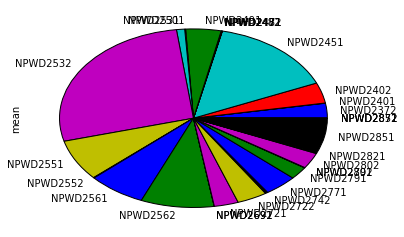

In [68]:
df_power_desc.iloc[1,0:31].plot(kind='pie')

In [13]:
filename="power_h_tot_and_mean"
#df_power.to_pickle(dir_data+filename+".p")
#df_power.to_csv(dir_data+filename+".csv")
df_power = pd.read_pickle(dir_data+filename+".p")

In [14]:
0.133582/5.015263

0.026635093712931907

In [17]:
df_power['total'] = df_power.sum(axis=1)

In [18]:
# I normalize 
df_power_norm = df_power.div(df_power.total, axis=0)
df_power_norm['total'] = df_power['total']

In [20]:
df_power_norm.head()

NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
ut_ms                                                                   
2008-08-22 00:00:00  0.008878  0.000103  0.011660  0.043683  0.000050   
2008-08-22 01:00:00  0.013280  0.000092  0.010764  0.052320  0.000044   
2008-08-22 02:00:00  0.008478  0.000082  0.009536  0.058666  0.000039   
2008-08-22 03:00:00  0.005817  0.000109  0.012523  0.051476  0.000053   
2008-08-22 04:00:00  0.007443  0.000108  0.012495  0.059425  0.000053   

                     NPWD2472  NPWD2481  NPWD2482  NPWD2491  NPWD2501  \
ut_ms                                                                   
2008-08-22 00:00:00  0.000044  0.000039  0.000128  0.016260  0.000351   
2008-08-22 01:00:00  0.000038  0.000034  0.000112  0.014129  0.000307   
2008-08-22 02:00:00  0.000035  0.000031  0.000101  0.011023  0.000279   
2008-08-22 03:00:00  0.000046  0.000041  0.000135  0.015158  0.000369   
2008-08-22 04:00:00  0.000046  0.000040  0.000135  0.016418  0.000371   

                       ...      NPWD2801  NPWD2802  NPWD2821  NPWD2851  \
ut_ms                  ...                                               
2008-08-22 00:00:00    ...      0.000101  0.010616  0.000382  0.000350   
2008-08-22 01:00:00    ...      0.000091  0.002870  0.000343  0.000308   
2008-08-22 02:00:00    ...      0.000082  0.015306  0.000309  0.000277   
2008-08-22 03:00:00    ...      0.000109  0.010167  0.000410  0.000375   
2008-08-22 04:00:00    ...      0.000109  0.004158  0.000413  0.000371   

                     NPWD2852  NPWD2871  NPWD2872  NPWD2881  NPWD2882  \
ut_ms                                                                   
2008-08-22 00:00:00  0.000035  0.000035  0.000051  0.000450  0.000225   
2008-08-22 01:00:00  0.000031  0.000031  0.000045  0.000404  0.000200   
2008-08-22 02:00:00  0.000028  0.000028  0.000040  0.000357  0.000179   
2008-08-22 03:00:00  0.000038  0.000037  0.000053  0.000481  0.000245   
2008-08-22 04:00:00  0.000038  0.000038  0.000053  0.000479  0.000242   

                         total  
ut_ms                           
2008-08-22 00:00:00  15.045789  
2008-08-22 01:00:00  16.340042  
2008-08-22 02:00:00  18.392373  
2008-08-22 03:00:00  14.000288  
2008-08-22 04:00:00  13.943260  

[5 rows x 34 columns]

In [60]:
df_power_norm.describe()

NPWD2372      NPWD2401      NPWD2402      NPWD2451      NPWD2471  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.026916      0.000408      0.038283      0.145835      0.000161   
std        0.007827      0.001541      0.008116      0.049426      0.000034   
min        0.000303      0.000178      0.007439      0.000776      0.000079   
25%        0.021508      0.000283      0.032475      0.106271      0.000137   
50%        0.026220      0.000324      0.037148      0.139655      0.000156   
75%        0.031618      0.000371      0.042531      0.183923      0.000179   
max        0.078240      0.054671      0.096159      0.382898      0.000411   

           NPWD2472      NPWD2481      NPWD2482      NPWD2491      NPWD2501  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.000267      0.000415      0.000482      0.042728      0.001151   
std        0.000133      0.003434      0.001469      0.010463      0.001980   
min        0.000083      0.000068      0.000222      0.000356      0.000615   
25%        0.000150      0.000106      0.000351      0.036334      0.000965   
50%        0.000237      0.000122      0.000401      0.042576      0.001103   
75%        0.000364      0.000140      0.000460      0.048898      0.001262   
max        0.001209      0.074622      0.064346      0.150393      0.314688   

           ...           NPWD2801      NPWD2802      NPWD2821      NPWD2851  \
count      ...       49125.000000  49125.000000  49125.000000  49125.000000   
mean       ...           0.000335      0.027658      0.001262      0.061136   
std        ...           0.000071      0.014944      0.000268      0.030998   
min        ...           0.000181      0.000332      0.000682      0.000730   
25%        ...           0.000285      0.016079      0.001071      0.039692   
50%        ...           0.000325      0.028178      0.001223      0.063863   
75%        ...           0.000372      0.038004      0.001401      0.079675   
max        ...           0.000841      0.078999      0.003193      0.194005   

           NPWD2852      NPWD2871      NPWD2872      NPWD2881      NPWD2882  \
count  49125.000000  49125.000000  49125.000000  49125.000000  49125.000000   
mean       0.000115      0.000114      0.000163      0.008883      0.000737   
std        0.000028      0.000024      0.000035      0.029091      0.000157   
min        0.000062      0.000062      0.000088      0.000843      0.000401   
25%        0.000098      0.000097      0.000138      0.001273      0.000625   
50%        0.000111      0.000110      0.000158      0.001466      0.000714   
75%        0.000128      0.000126      0.000181      0.001719      0.000818   
max        0.001827      0.000288      0.000412      0.252993      0.001848   

              total  
count  49125.000000  
mean       4.770046  
std        0.933270  
min        1.824257  
25%        4.122822  
50%        4.720068  
75%        5.399369  
max        8.596338  

[8 rows x 34 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f173d7cfcc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f172758b438>], dtype=object)

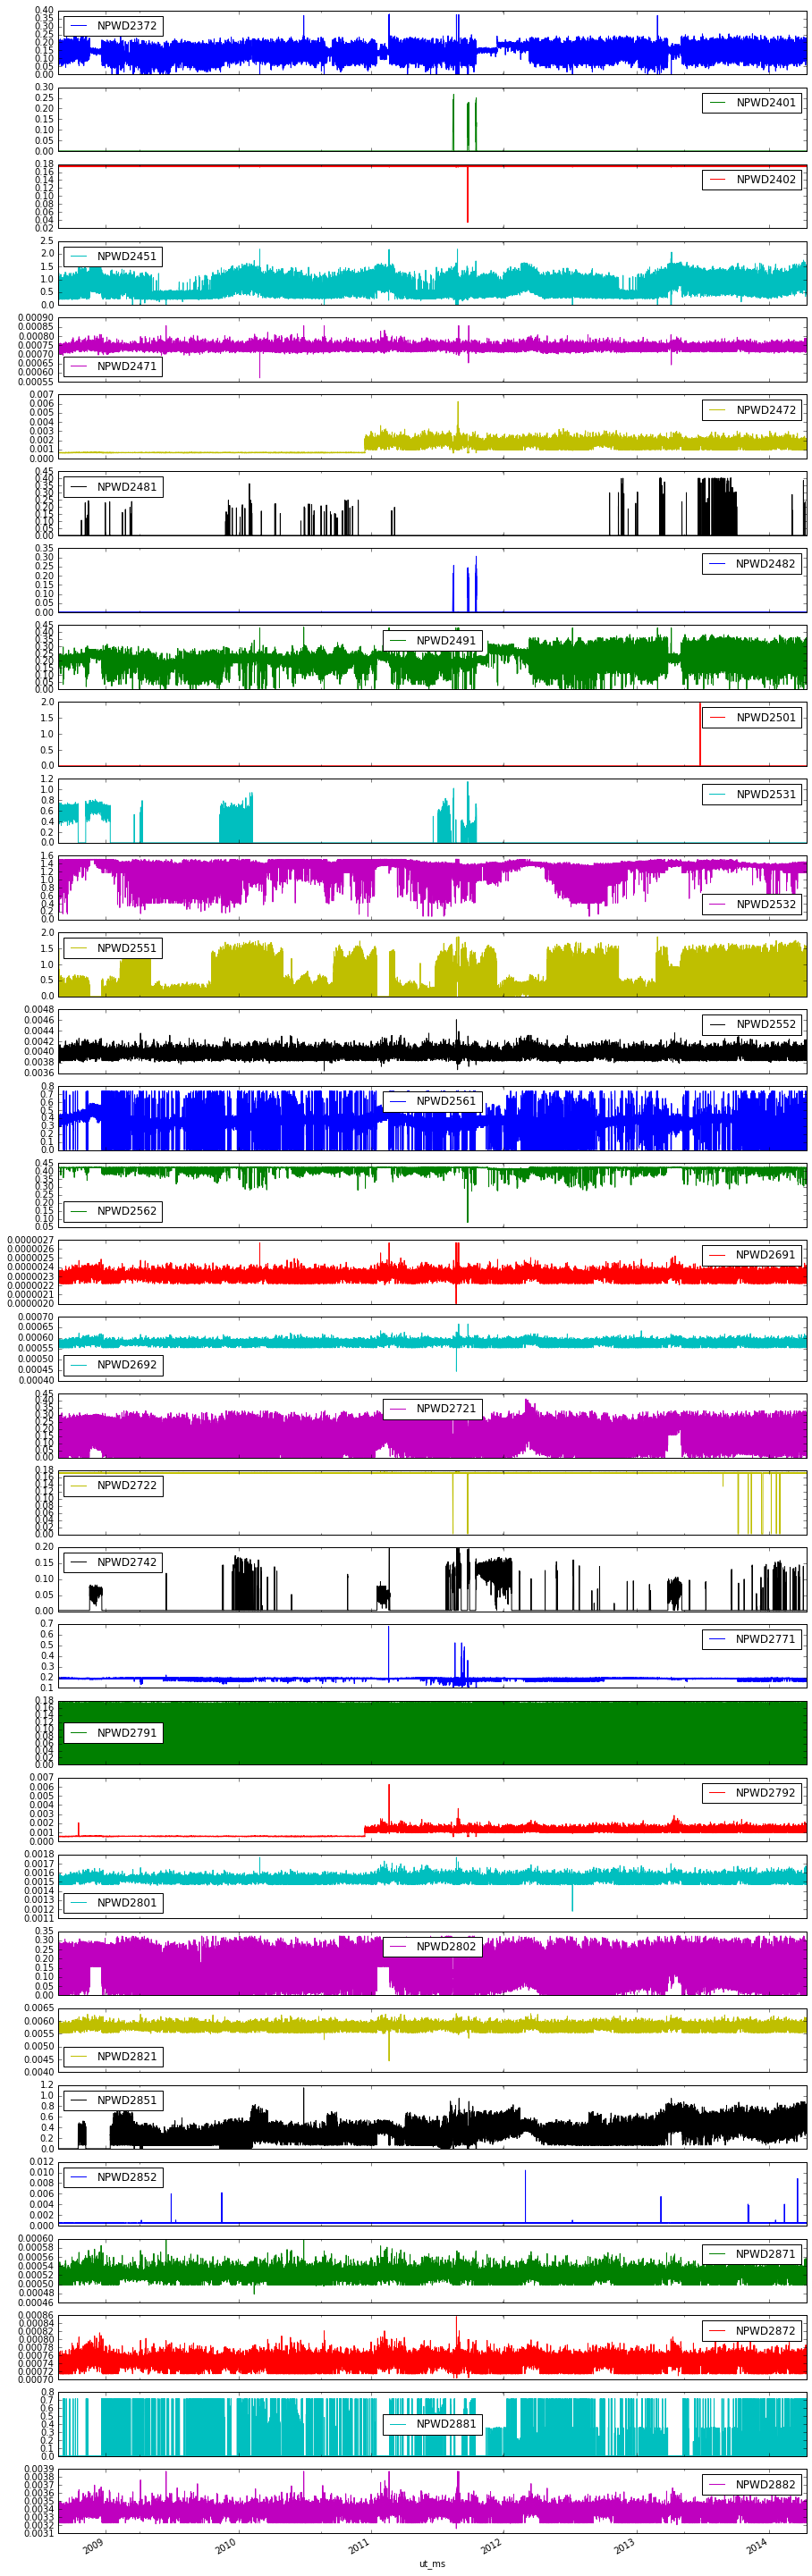

In [205]:
df_power.plot(subplots=True, figsize=(15, 56))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f171fa206a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f171f11de48>], dtype=object)

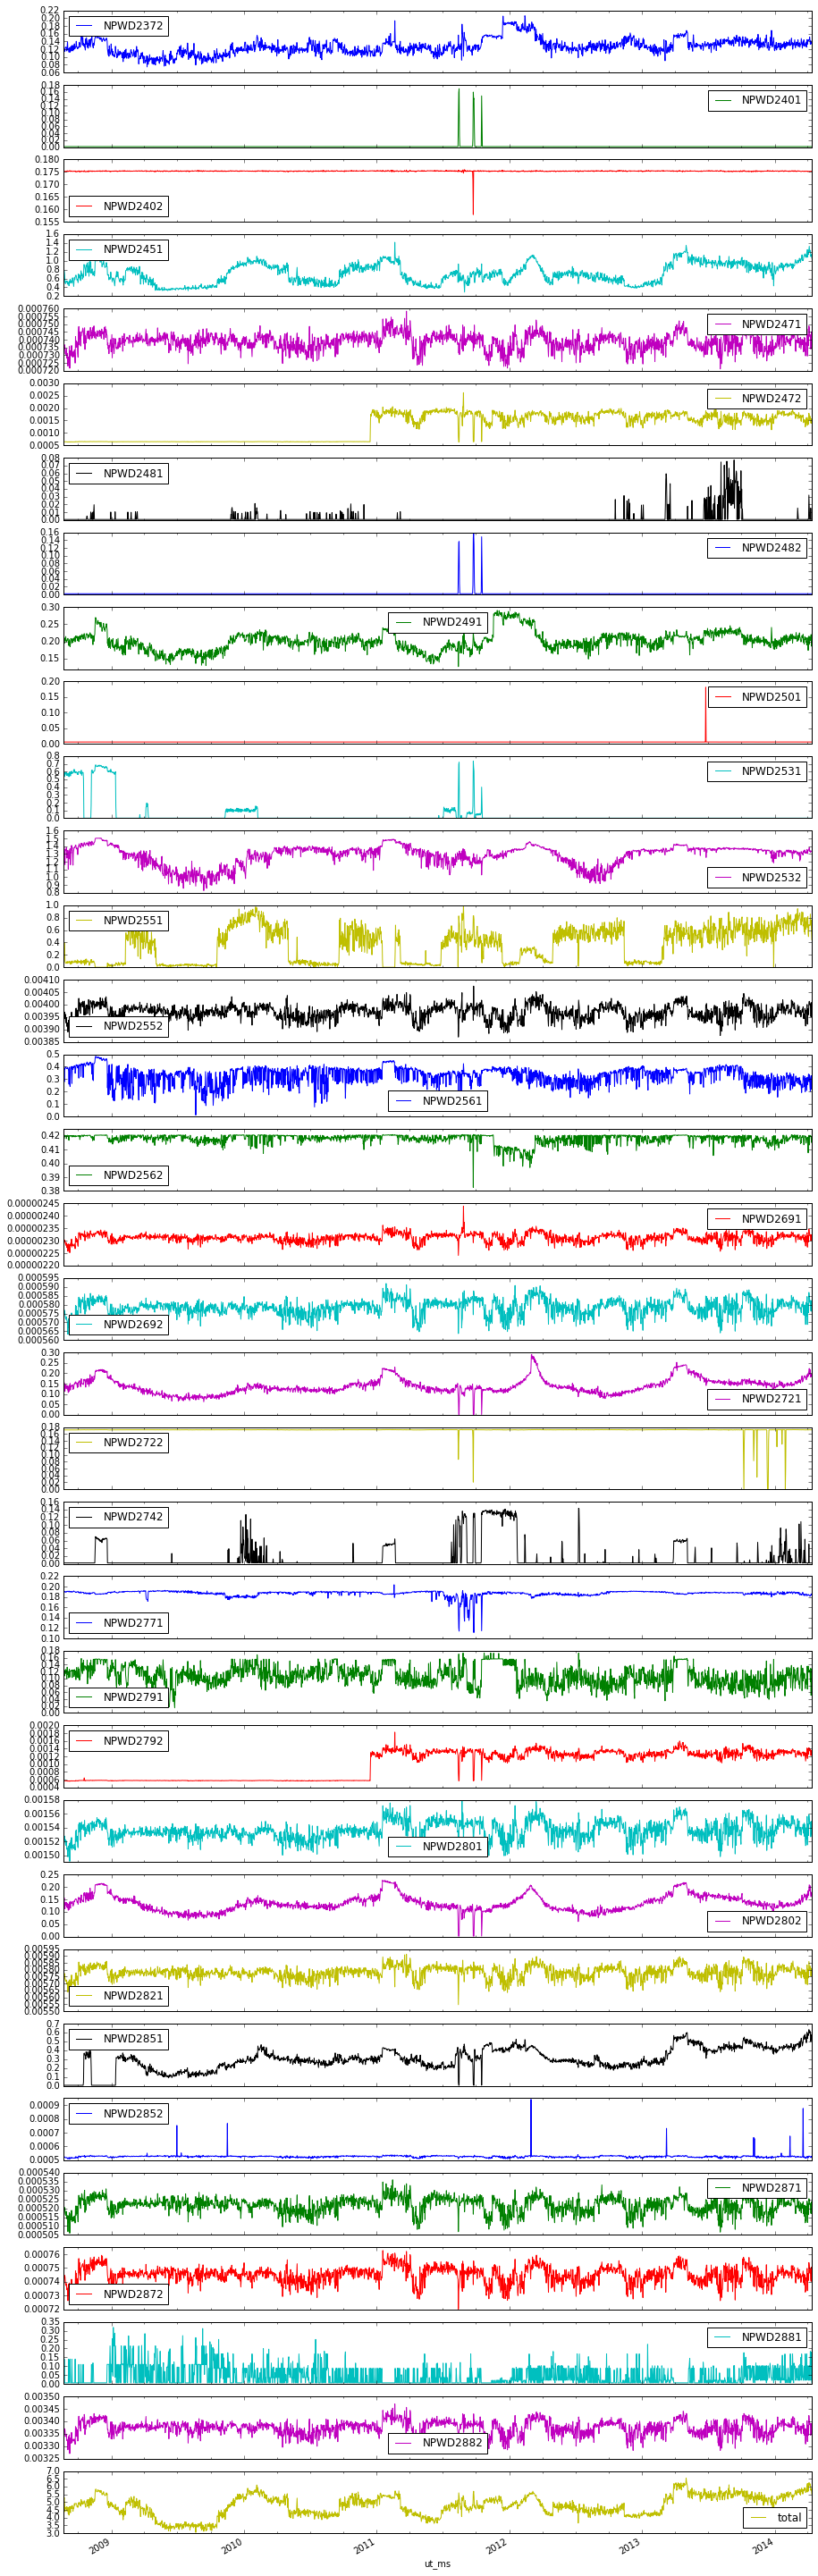

In [209]:
df_power.resample('D').mean().plot(subplots=True, figsize=(15, 56))

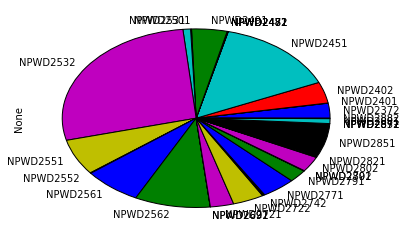

In [196]:
df_power_norm.drop('total',axis=1).mean().plot(kind='pie')

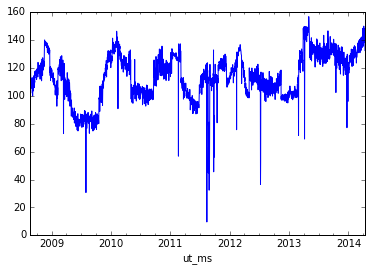

In [201]:
df_power_norm['total'].resample("D").sum().plot()

## I try autocorrelation

In [21]:
from pandas.tools.plotting import autocorrelation_plot

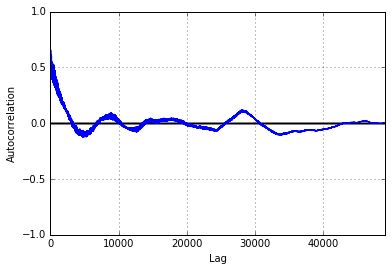

In [23]:
plt.figure()
autocorrelation_plot(df_power_norm['total'])

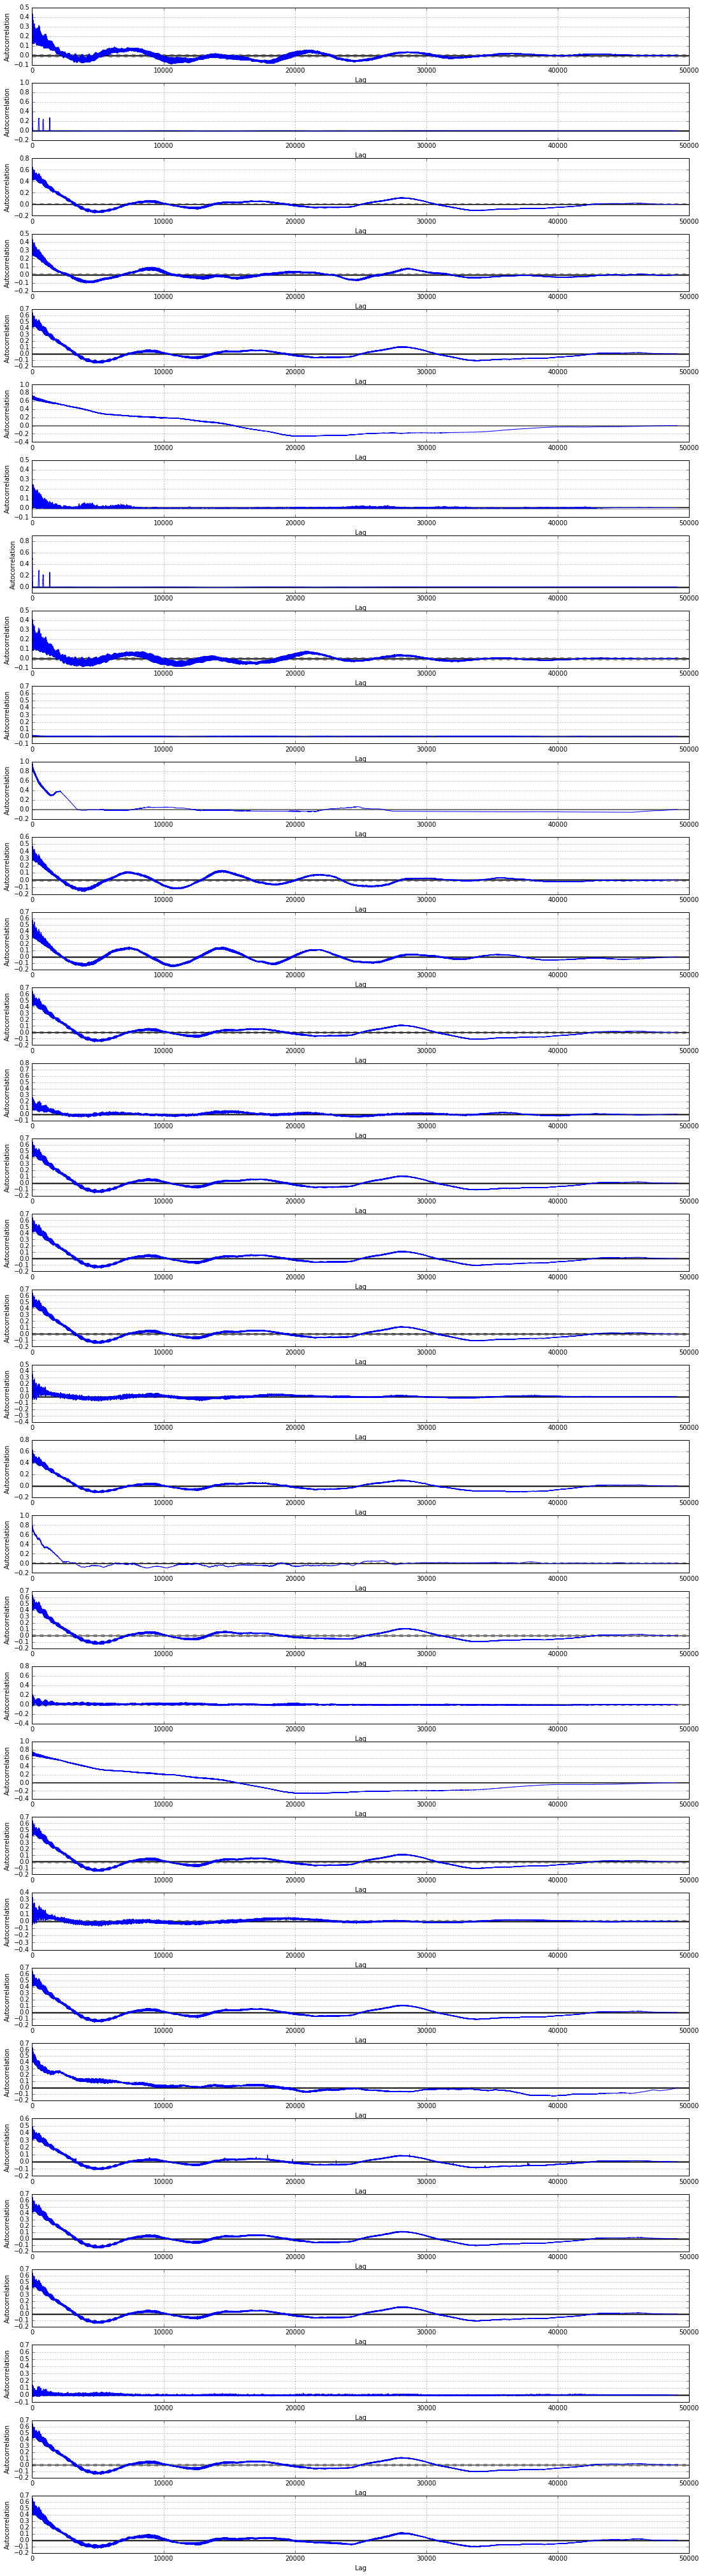

In [33]:
plt.figure()
tmp_col = df_power_norm.columns
fig, axes = plt.subplots(nrows=len(tmp_col), figsize=(15, 56))
fig.tight_layout()
for idx,col in enumerate(tmp_col):
    axes[idx]
    autocorrelation_plot(df_power_norm[col],ax = axes[idx])

## Lo strano evento 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f171e4acfd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f171daff748>], dtype=object)

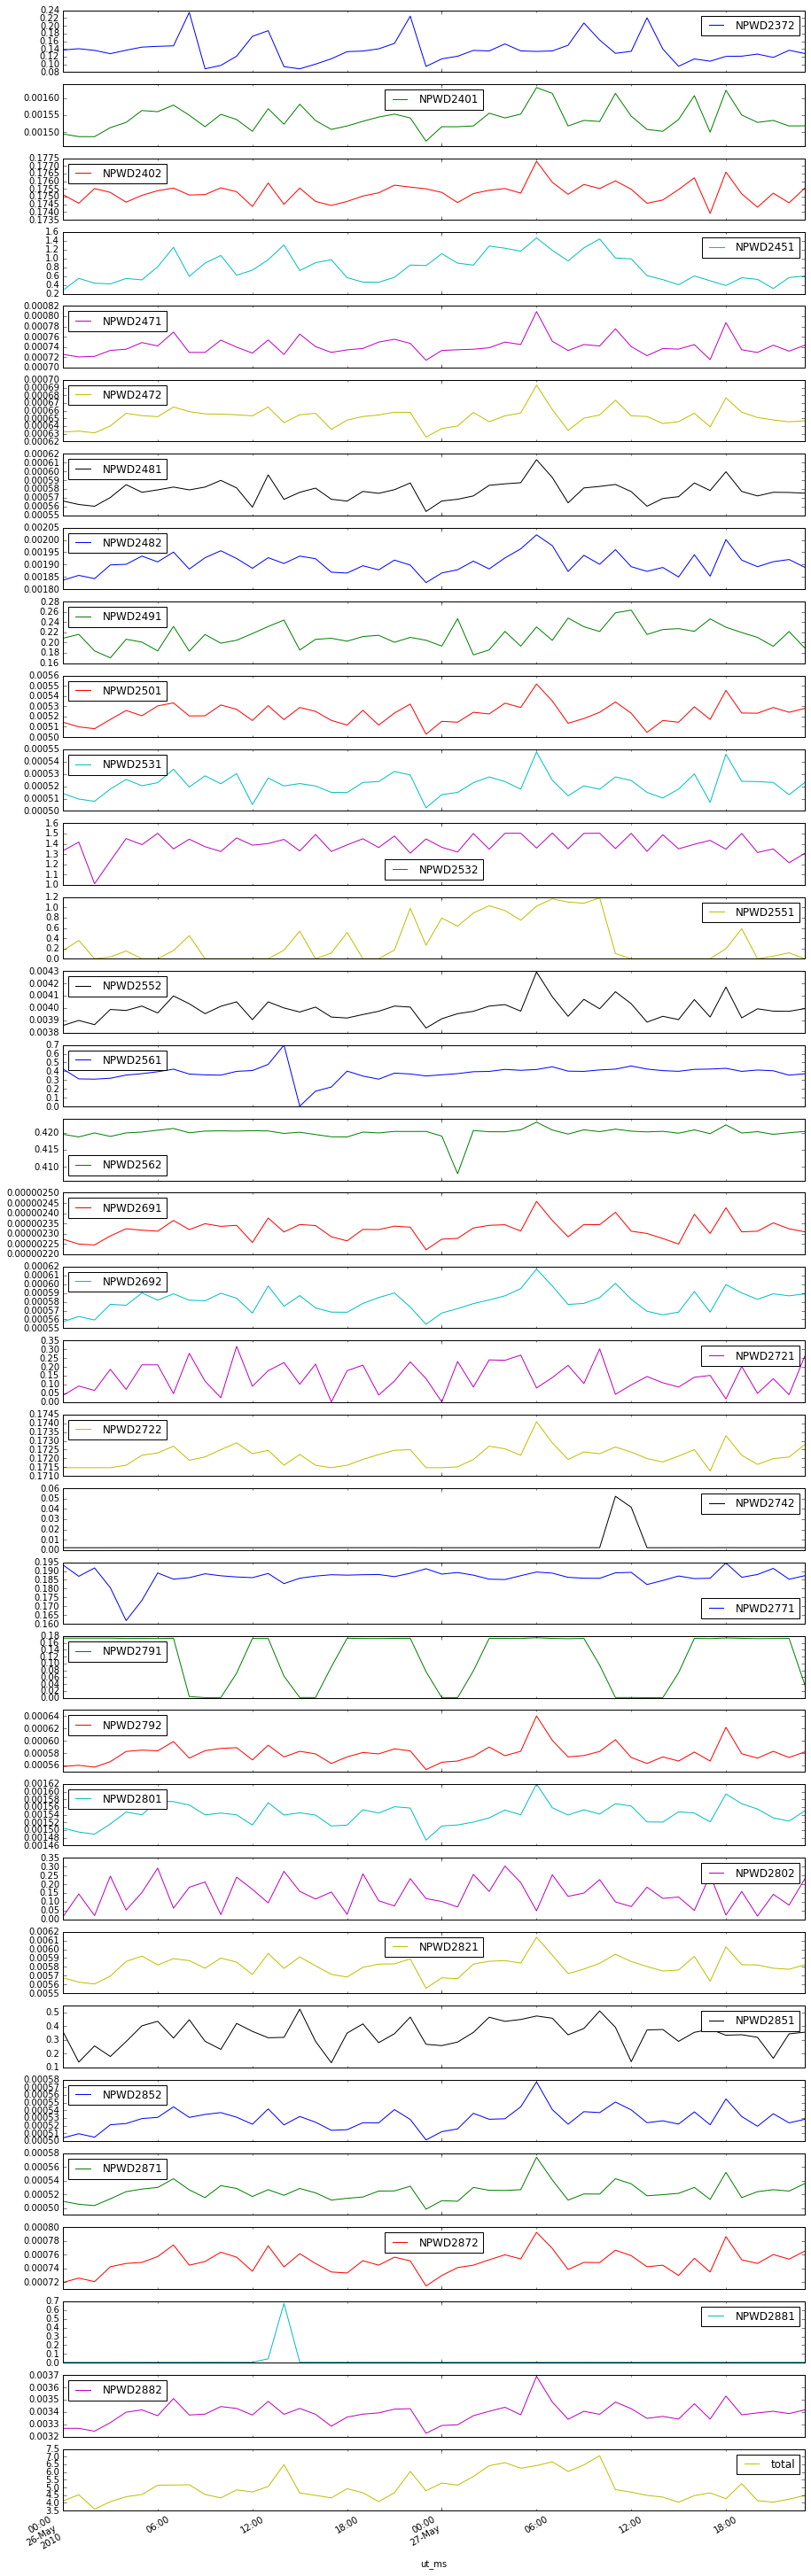

In [210]:
df_power['2010-05-26':'2010-05-27'].plot(subplots=True, figsize=(15, 56))

## Power Timeline

In [17]:
power_files = glob.glob(dir_raw_data+"train_set/power*")

In [18]:
power_files.append(dir_raw_data+"power-prediction-sample-2014-04-14_2016-03-01.csv")

In [8]:
power_list = []
for fl in power_files:
    df = pd.read_csv(fl)
    df = convert_time(df)
    
    #df = resample_1H(df)
    #df = df.dropna()
    df.set_index('ut_ms',inplace=True)
    power_cols = list(df.columns)
    df.drop(power_cols, axis=1,inplace=True)
    print(df.head())

    
    power_list.append(df)
    print(fl + "....loaded")

Empty DataFrame
Columns: []
Index: [2008-08-22 00:00:09.542000, 2008-08-22 00:00:41.537000, 2008-08-22 00:01:13.542000, 2008-08-22 00:01:45.537000, 2008-08-22 00:02:17.542000]
../raw_data/mars-express-power-3years/train_set/power--2008-08-22_2010-07-10.csv....loaded
Empty DataFrame
Columns: []
Index: [2010-07-10 00:00:08.577000, 2010-07-10 00:01:12.577000, 2010-07-10 00:01:44.559000, 2010-07-10 00:02:16.566000, 2010-07-10 00:02:48.562000]
../raw_data/mars-express-power-3years/train_set/power--2010-07-10_2012-05-27.csv....loaded
Empty DataFrame
Columns: []
Index: [2012-05-27 00:00:09.760000, 2012-05-27 00:01:13.778000, 2012-05-27 00:01:45.758000, 2012-05-27 00:02:17.760000, 2012-05-27 00:02:49.758000]
../raw_data/mars-express-power-3years/train_set/power--2012-05-27_2014-04-14.csv....loaded
Empty DataFrame
Columns: []
Index: [2014-04-14 00:00:00, 2014-04-14 01:00:00, 2014-04-14 02:00:00, 2014-04-14 03:00:00, 2014-04-14 04:00:00]
../raw_data/mars-express-power-3years/power-prediction-sam

In [9]:
power_list[3].head(2)

Empty DataFrame
Columns: []
Index: [2014-04-14 00:00:00, 2014-04-14 01:00:00]

In [10]:
df_onlytime = pd.concat(power_list)
del power_list

In [16]:
df_onlytime.head()

NameError: name 'df_onlytime' is not defined

In [12]:
df_onlytime.to_csv(dir_data + "timeline.csv")

In [13]:
df_onlytime.to_pickle(dir_data + "timeline.p")

# LTDATA files - 
Quoting the description: 
> long term data including sun-mars distance and solar constant on Mars.

> - **ut_ms**: unix timestamp in milliseconds, this data provides one sample per day
> - **sunmars_km**: the distance in kilometers between the Sun and Mars
> - **earthmars_km**: the distance in kilometers between the Earth and Mars
> - **sunmarsearthangle_deg**: Sun-Mars-Earth angle in degrees
> - **solarconstantmars**: solar constant at Mars in $W/m^2$
> - **eclipseduration_min**: total durations of all eclipses in the day, in minutes
> - **occultationduration_min**: total durations of all occultations in the day, in minutes

In [8]:
ltdata_files = glob.glob(dir_raw_data + 'train_set/*ltdata.csv')

In [9]:
ltdata_list = []
for fl in ltdata_files:
    ltdata_list.append(pd.read_csv(fl))
    print(fl + "....loaded")

../raw_data/mars-express-power-3years/train_set/context--2012-05-27_2014-04-14--ltdata.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2008-08-22_2010-07-10--ltdata.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2010-07-10_2012-05-27--ltdata.csv....loaded


In [10]:
df_ltdata = pd.concat(ltdata_list)
df_ltdata['ut_ms'] = pd.to_datetime(df_ltdata['ut_ms'], unit='ms')

In [11]:
df_ltdata.set_index('ut_ms',inplace=True)

In [12]:
df_ltdata.head()

sunmars_km  earthmars_km  sunmarsearthangle_deg  \
ut_ms                                                           
2012-05-27  2.419149e+08  1.717432e+08              38.486638   
2012-05-28  2.417759e+08  1.729364e+08              38.572085   
2012-05-29  2.416359e+08  1.741283e+08              38.652601   
2012-05-30  2.414947e+08  1.753189e+08              38.728317   
2012-05-31  2.413525e+08  1.765078e+08              38.799358   

            solarconstantmars  eclipseduration_min  occultationduration_min  
ut_ms                                                                        
2012-05-27         522.367711            30.100000                      0.0  
2012-05-28         522.968268            30.616667                      0.0  
2012-05-29         523.574665            31.266667                      0.0  
2012-05-30         524.186895            31.716667                      0.0  
2012-05-31         524.804950            32.166667                      0.0

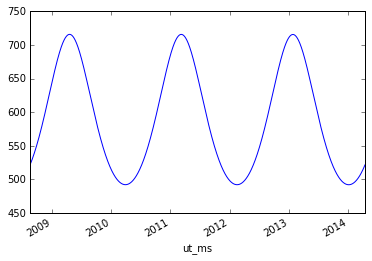

In [13]:
df_ltdata['solarconstantmars'].plot()

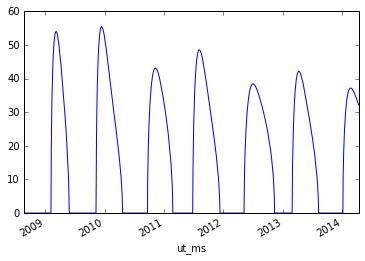

In [14]:
df_ltdata['eclipseduration_min'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1114299550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f11140d9240>], dtype=object)

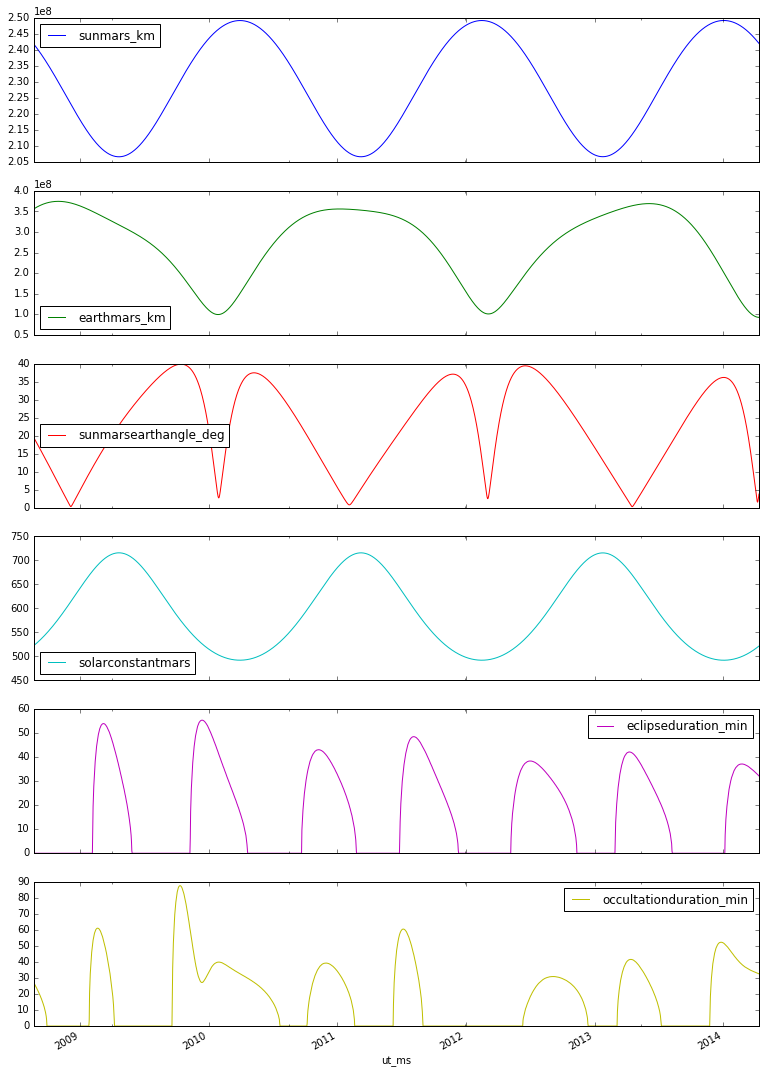

In [15]:

df_ltdata.plot(subplots=True,figsize=(13,20))

# DMOP files - Detailed Mission Operations Plan Files
Quoting the data description:
> - **ut_ms**: unix timestamp in milliseconds
> - **subsystem**: name of the operated subsystem command
> 
> The DMOP files show when the different subsystems' commands have been triggered. Each subsystem command string include > the subsystem name along with the command name. Each subsystem command name can be considered as a signature. Due to 
> the amount of different commands, they won't be explained here. These commands have different effects on temperatures of the different subsystems of the spacecraft thus impacting in different ways the thermal subsystem's reactions. In these commands you may find the ON/OFF of radio communications, the ON/OFF of the science instruments, etc.

### ToDo
 - Do a frequency check of the appearence of the commands.

In [9]:
#../raw_data/mars-express-power-3years/test_set/

In [6]:
dmop_files = glob.glob(dir_raw_data + 'train_set/*dmop.csv')
dmop_files_2 = glob.glob(dir_raw_data + 'test_set/*dmop.csv')

dmop_list = []
for fl in (dmop_files + dmop_files_2):
    dmop_list.append(pd.read_csv(fl))
    print(fl + "....loaded")
df_dmop = pd.concat(dmop_list)
df_dmop['ut_ms'] = pd.to_datetime(df_dmop['ut_ms'], unit='ms')
df_dmop.set_index('ut_ms',inplace=True)
del dmop_list

../raw_data/mars-express-power-3years/train_set/context--2012-05-27_2014-04-14--dmop.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2010-07-10_2012-05-27--dmop.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2008-08-22_2010-07-10--dmop.csv....loaded
../raw_data/mars-express-power-3years/test_set/context--2014-04-14_2016-03-01--dmop.csv....loaded


In [11]:
df_dmop.head(30)

subsystem
ut_ms                               
2012-05-27 20:12:38  MAPO.0000010705
2012-05-27 23:04:02  PENS.0000005051
2012-05-27 23:34:08  PENE.0000005051
2012-05-27 23:34:09  PENE.0000005051
2012-05-27 23:42:18  MPER.0000000705
2012-05-27 23:42:19  MPER.0000010705
2012-05-28 03:12:05  MAPO.0000000706
2012-05-28 03:12:06  MAPO.0000010706
2012-05-28 03:47:56          Trigger
2012-05-28 03:49:22         ATMB228K
2012-05-28 03:58:06         ATTT305O
2012-05-28 05:00:31          Trigger
2012-05-28 05:01:49        AAAAF40A0
2012-05-28 05:09:19        AAAAF40B0
2012-05-28 05:45:20         ATTT309A
2012-05-28 06:03:25  PENS.0000005052
2012-05-28 06:05:18          Trigger
2012-05-28 06:06:34        ATTTF030A
2012-05-28 06:15:14          Trigger
2012-05-28 06:18:34        AMMMF40A0
2012-05-28 06:19:04         AACFE91A
2012-05-28 06:20:04         AACFM02A
2012-05-28 06:21:05         AACFE03A
2012-05-28 06:21:07         AACFE91A
2012-05-28 06:21:09         AACFE05A
2012-05-28 06:22:49        AMMMF12A0
2012-05-28 06:22:54        AMMMF11A0
2012-05-28 06:22:59        AMMMF10A0
2012-05-28 06:23:04        AMMMF24A0
2012-05-28 06:23:09        AMMMF23A0

I check what kind of world appears.

Firstly, how many single commands there are:

In [7]:
df_dmop.shape

(644651, 1)

In [8]:
df_dmop['subsystem'].unique().shape

(42123,)

So there are something liks 29130 commands on 494906 events. 

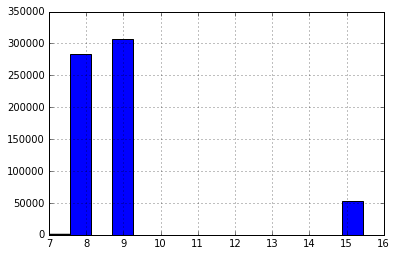

In [40]:

df_dmop['subsystem'].str.len().hist(bins=16)

The most frequent commands are

In [10]:
uniqe_dmop_cmd = df_dmop['subsystem'].value_counts()
uniqe_dmop_cmd.head(20)

AACFE91A     37317
AACFE03A     36424
AAAAF56A1    20035
APSF28A1     18312
APSF38A1     16881
AACFE05A     16719
AAAAF20E1    13440
AMMMF10A0    11852
AVVV02A0     10073
AVVV03B0      9774
AACFM07A      9400
AACFM06A      9341
AAAAF20C1     9205
AACFM01A      7353
AACFM02A      7342
APSF50A2      6869
ATTTF030A     6807
AMMMF18A0     6783
AMMMF19A0     6712
ATTTF030B     6668
Name: subsystem, dtype: int64

In [12]:
uniqe_dmop_cmd.tail(50)

MPER.0000007208    1
MPER.0000009374    1
MPER.0000011536    1
MAPO.0000001013    1
MOCE.0000004187    1
MPER.0000001957    1
MPER.0000015115    1
MPER.0000011069    1
MOCS.0000004339    1
MPER.0000012866    1
PENE.0000003487    1
MAPO.0000000122    1
PENE.0000003606    1
MPER.0000015051    1
MAPO.0000003336    1
PENS.0000004072    1
MPER.0000014266    1
PENS.0000007209    1
PENE.0000006027    1
MPER.0000000946    1
MAPO.0000006130    1
MAPO.0000004366    1
MPER.0000003992    1
MPER.0000012092    1
PENS.0000006481    1
MPER.0000008621    1
MAPO.0000009347    1
MAPO.0000010372    1
MAPO.0000010727    1
PENS.0000007867    1
MAPO.0000015296    1
MAPO.0000006306    1
MPER.0000002210    1
MPER.0000014132    1
MOCE.0000004067    1
MAPO.0000008804    1
MPER.0000000536    1
MPER.0000002236    1
MOCE.0000006677    1
MAPO.0000010057    1
PENE.0000002940    1
MAPO.0000002564    1
MPER.0000008716    1
MAPO.0000008693    1
PENE.0000004226    1
MOCE.0000007392    1
MOCS.0000006167    1
MPER.00000000

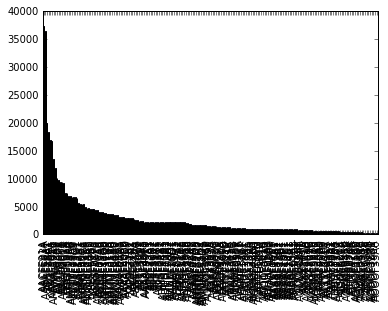

In [42]:

uniqe_dmop_cmd.head(200).plot(kind='bar')

Let's find how many command are issued per day:

In [43]:
df_dmop['n'] = 1

In [44]:
dmop_perDay = df_dmop.n.resample('D').sum()

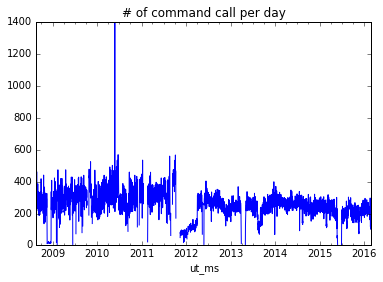

In [45]:
#plt.figure();
dmop_perDay.plot(); plt.title('# of command call per day')

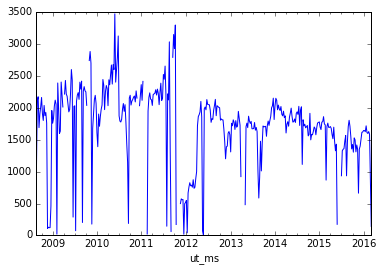

In [46]:
df_dmop.n.resample('W').sum().plot()

There is clearl a couple of strange events

In [47]:
strg_events = dmop_perDay[dmop_perDay>600]

In [48]:
strg_events

ut_ms
2010-05-27    1398.0
Freq: D, Name: n, dtype: float64

In [49]:
dmop_filename = "dmop_per_day"
dmop_perDay.to_csv(dir_data + dmop_filename + ".csv")
dmop_perDay.to_pickle(dir_data + dmop_filename + ".p")

## Strange communication event May 27, 2010

So on May 27, 2010 something strange happend

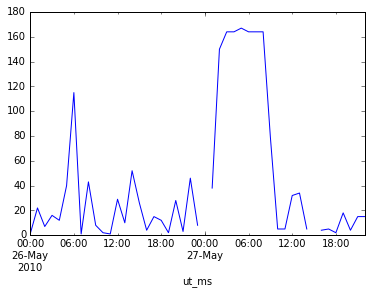

In [23]:
df_dmop['2010-05-26':'2010-05-27'].n.resample('h').sum().plot()

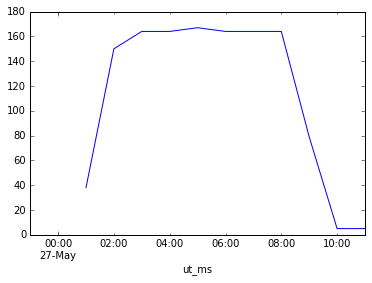

In [24]:
df_dmop['2010-05-26 23:00:00':'2010-05-27 12:00:00'].n.resample('h').sum().plot()

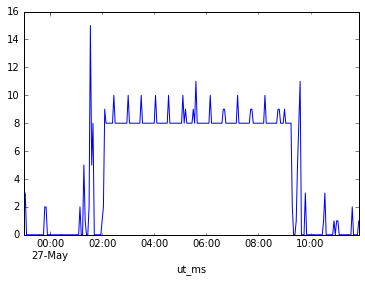

In [25]:
df_dmop['2010-05-26 23:00:00':'2010-05-27 12:00:00'].n.resample('3T').sum().fillna(0).plot()

In [26]:
df_dmop['2010-05-26 23:00:00':'2010-05-27 12:00:00']['subsystem'].value_counts()

AVVV03B0           589
AVVV02A0           589
APSF28A1             8
AHHHF19A1            8
APSF38A1             4
AAAAF20E1            3
APSF06A2             2
APSF14A2             2
AAAAF20C1            2
APSF03A3             2
ATTTF301F            2
AHHHF01A2            1
ASXX382C             1
APSF30C2             1
ATTTF301B            1
ATTTF301E            1
AHHHF05A2            1
AAAAF60A1            1
ASEQ4200             1
ASSSF56A0            1
AVVV03A0             1
APSF40A1             1
AAAAF23B2            1
AHHHF50A2            1
AAAAF19D1            1
AVVV05A0             1
APSF13A3             1
APSF82A1             1
AAAAF10A1            1
MPER.0000008194      1
                  ... 
AHHHF13A1            1
AAAAF19A1            1
APSF02A1             1
ASSSF01A0            1
AAAAF57A1            1
ASSSF06A0            1
AVVV01A0             1
ATTTF301J            1
APSF32A1             1
APSF12H1             1
APSF30B2             1
AAAAF23G1            1
AVVV07A0   

## Strange change in communication pattern


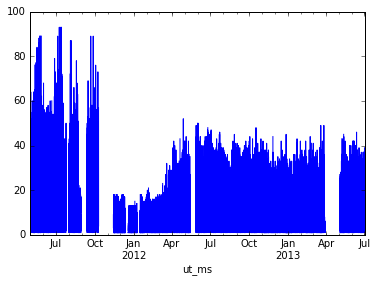

In [27]:
df_dmop['2011-05-01':'2013-07-01'].n.resample('h').sum().plot()

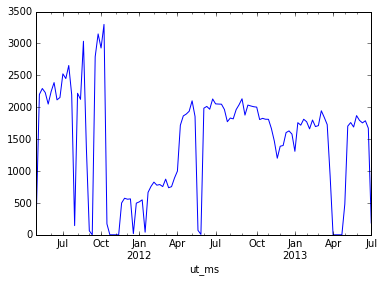

In [33]:
df_dmop['2011-05-01':'2013-07-01'].n.resample('W').sum().fillna(0).plot()

## Just for fun
Are the commands human based? if so, we could see a drop during holidas

In [40]:

week_day_ents = df_dmop.groupby(lambda x: x.strftime('%w')).sum()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


n
0  70121
1  72035
2  69926
3  71562
4  72526
5  69442
6  69294

In [51]:
day_of_week = { 
    "0": 'Sun',
    "1": 'Mon',
    "2": 'Tue',
    "3": 'Wen',
    "4": 'Thu',
    "5": 'Fri',
    "6": 'Sat'    
}
week_day_ents.rename(day_of_week,inplace=True)
week_day_ents = pd.concat([week_day_ents[1:],week_day_ents[:1]])

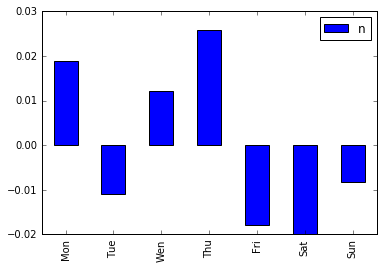

In [52]:
week_day_mean = week_day_ents.mean()
(week_day_ents / week_day_mean - 1).plot(kind='bar')

# FTL - files - listing of spacecraft pointing events (Flight Dynamics TimeLine).

From the descritption page
> - **utb_ms**: unix timestamp in milliseconds of the time the pointing period begins
> - **ute_ms**: unix timestamp in milliseconds of the time the same pointing period ends
> - **type**: type of pointing or action
> - **flagcomms**: TRUE if any communication device was used, else FALSE.
>
>The events listed here are pointing and action commands that can impact the attitude of the satellite, thus they also may impact the solar aspect angles of the orbiter and/or the switch ON/OFF of some instrumentation.

In [64]:
ftl_files = glob.glob(dir_raw_data + 'train_set/*ftl.csv')
ftl_files_2 = glob.glob(dir_raw_data + 'test_set/*ftl.csv')

ftl_list = []
for fl in (ftl_files + ftl_files_2):
    ftl_list.append(pd.read_csv(fl))
    print(fl + "....loaded")
df_ftl = pd.concat(ftl_list)
#df_ftl['ut_ms'] = pd.to_datetime(df_ftl['ut_ms'], unit='ms')
#df_ftl.set_index('ut_ms',inplace=True)
del ftl_list

../raw_data/mars-express-power-3years/train_set/context--2012-05-27_2014-04-14--ftl.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2010-07-10_2012-05-27--ftl.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2008-08-22_2010-07-10--ftl.csv....loaded
../raw_data/mars-express-power-3years/test_set/context--2014-04-14_2016-03-01--ftl.csv....loaded


In [65]:
df_ftl.head()

utb_ms         ute_ms      type flagcomms
0  1338078562000  1338080362000      SLEW     False
1  1338080362000  1338083482000     EARTH      True
2  1338083482000  1338085282000      SLEW     False
3  1338085282000  1338086202000  INERTIAL     False
4  1338086202000  1338087712000      SLEW     False

In [66]:
df_ftl['utb_ms'] = pd.to_datetime(df_ftl['utb_ms'], unit='ms')
df_ftl['ute_ms'] = pd.to_datetime(df_ftl['ute_ms'], unit='ms')
#df_ftl.set_index('utb_ms',inplace=True)

In [67]:
df_ftl.head()

utb_ms              ute_ms      type flagcomms
0 2012-05-27 00:29:22 2012-05-27 00:59:22      SLEW     False
1 2012-05-27 00:59:22 2012-05-27 01:51:22     EARTH      True
2 2012-05-27 01:51:22 2012-05-27 02:21:22      SLEW     False
3 2012-05-27 02:21:22 2012-05-27 02:36:42  INERTIAL     False
4 2012-05-27 02:36:42 2012-05-27 03:01:52      SLEW     False

In [68]:
df_ftl.type.value_counts()

SLEW             27317
EARTH            20420
INERTIAL          7154
D4PNPO            3409
MAINTENANCE       2653
NADIR             2173
WARMUP            1261
ACROSS_TRACK      1033
RADIO_SCIENCE      690
D1PVMC             404
D9PSPO             148
D2PLND             114
SPECULAR            47
NADIR_LANDER        42
D3POCM              22
D7PLTS              16
SPOT                15
D8PLTP               6
D5PPHB               4
Name: type, dtype: int64

In [70]:
ftl_types = df_ftl.type.unique()

In [98]:
df_ftl['length'] = df_ftl['ute_ms'] - df_ftl['utb_ms']

In [99]:
df_ftl['length'].mean()

Timedelta('0 days 00:59:45.524190')

So, in average, it takes one hour

In [106]:
df_ftl['length'].max()

Timedelta('32 days 22:00:00')

In [107]:
df_ftl['length'].min()

Timedelta('0 days 00:00:18')

In [127]:
(C).sum()

1

In [128]:
df_ftl[(df_ftl['length']>'1 day')]

utb_ms              ute_ms      type flagcomms  \
6910  2013-03-29 01:59:50 2013-03-30 11:26:11     EARTH     False   
6912  2013-03-30 12:56:11 2013-03-31 22:22:27     EARTH     False   
6914  2013-03-31 23:52:27 2013-04-02 02:19:26     EARTH     False   
6916  2013-04-02 03:49:26 2013-04-03 06:16:31     EARTH     False   
6918  2013-04-03 07:46:31 2013-04-04 10:13:29     EARTH     False   
6920  2013-04-04 11:43:29 2013-04-05 21:09:47     EARTH     False   
6922  2013-04-05 22:39:47 2013-04-07 01:06:50     EARTH     False   
6924  2013-04-07 02:36:50 2013-04-08 12:03:06     EARTH     False   
6926  2013-04-08 13:33:06 2013-04-09 22:59:25     EARTH     False   
6928  2013-04-10 00:29:25 2013-04-11 09:55:43     EARTH     False   
6930  2013-04-11 11:25:43 2013-04-12 20:52:02     EARTH     False   
6932  2013-04-12 22:22:02 2013-04-14 00:49:04     EARTH     False   
6934  2013-04-14 02:19:04 2013-04-15 11:45:22     EARTH     False   
6936  2013-04-15 13:15:22 2013-04-16 22:41:43     EARTH     False   
6938  2013-04-17 00:11:43 2013-04-18 09:38:00     EARTH     False   
6940  2013-04-18 11:08:00 2013-04-19 20:34:18     EARTH     False   
6942  2013-04-19 22:04:18 2013-04-21 00:31:24     EARTH     False   
6944  2013-04-21 02:01:24 2013-04-22 11:27:42     EARTH     False   
6946  2013-04-22 12:57:42 2013-04-23 22:24:00     EARTH     False   
6948  2013-04-23 23:54:00 2013-04-25 09:20:21     EARTH     False   
6950  2013-04-25 10:50:21 2013-04-26 20:16:41     EARTH     False   
6952  2013-04-26 21:46:41 2013-04-28 00:13:41     EARTH     False   
6955  2013-04-28 01:43:41 2013-04-29 11:10:02     EARTH     False   
6957  2013-04-29 12:40:02 2013-04-30 22:06:22     EARTH     False   
6959  2013-04-30 23:36:22 2013-05-02 02:03:25     EARTH     False   
12233 2013-12-28 18:02:35 2013-12-30 01:04:17     EARTH     False   
5896  2011-02-18 01:24:24 2011-02-19 10:52:42  INERTIAL      True   
5905  2011-02-20 09:21:41 2011-02-21 18:49:54     EARTH      True   
9690  2015-05-27 23:44:00 2015-05-29 03:00:00     EARTH      True   
9692  2015-05-29 03:30:00 2015-07-01 01:30:00     EARTH      True   
12201 2016-01-25 06:42:35 2016-01-26 09:10:50     EARTH      True   
12319 2016-02-18 04:18:29 2016-02-19 06:47:32     EARTH      True   
12335 2016-02-21 16:15:51 2016-02-22 18:45:10     EARTH      True   
12343 2016-02-23 17:14:31 2016-02-24 19:43:51     EARTH      True   
12351 2016-02-25 18:13:14 2016-02-26 20:42:33     EARTH      True   

                length  
6910   1 days 09:26:21  
6912   1 days 09:26:16  
6914   1 days 02:26:59  
6916   1 days 02:27:05  
6918   1 days 02:26:58  
6920   1 days 09:26:18  
6922   1 days 02:27:03  
6924   1 days 09:26:16  
6926   1 days 09:26:19  
6928   1 days 09:26:18  
6930   1 days 09:26:19  
6932   1 days 02:27:02  
6934   1 days 09:26:18  
6936   1 days 09:26:21  
6938   1 days 09:26:17  
6940   1 days 09:26:18  
6942   1 days 02:27:06  
6944   1 days 09:26:18  
6946   1 days 09:26:18  
6948   1 days 09:26:21  
6950   1 days 09:26:20  
6952   1 days 02:27:00  
6955   1 days 09:26:21  
6957   1 days 09:26:20  
6959   1 days 02:27:03  
12233  1 days 07:01:42  
5896   1 days 09:28:18  
5905   1 days 09:28:13  
9690   1 days 03:16:00  
9692  32 days 22:00:00  
12201  1 days 02:28:15  
12319  1 days 02:29:03  
12335  1 days 02:29:19  
12343  1 days 02:29:20  
12351  1 days 02:29:19

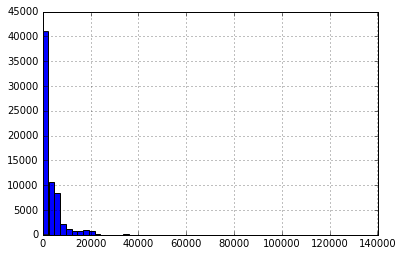

In [130]:
fig, ax = plt.subplots()
df_ftl[df_ftl['length']<'2 day']['length'].apply(lambda x: x.total_seconds()).hist(bins=50)
#ax.set_yscale('log')

In [133]:
df_ftl.type.value_counts()

SLEW             27317
EARTH            20420
INERTIAL          7154
D4PNPO            3409
MAINTENANCE       2653
NADIR             2173
WARMUP            1261
ACROSS_TRACK      1033
RADIO_SCIENCE      690
D1PVMC             404
D9PSPO             148
D2PLND             114
SPECULAR            47
NADIR_LANDER        42
D3POCM              22
D7PLTS              16
SPOT                15
D8PLTP               6
D5PPHB               4
Name: type, dtype: int64

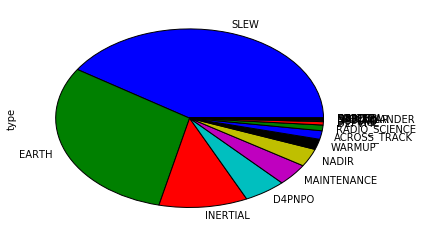

In [132]:
df_ftl.type.value_counts().plot(kind='pie')

In [138]:
for tps in list(ftl_types):
    print("for ",tps)
    print(df_ftl[df_ftl['type']==tps ]['length'].mean())
    #print(np.sqrt(df_ftl[df_ftl['type']==tps ]['length'].var()))

for  SLEW
0 days 00:21:06.114104
for  EARTH
0 days 01:52:40.632859
for  INERTIAL
0 days 00:31:47.553536
for  D4PNPO
0 days 01:07:49.711645
for  NADIR
0 days 00:54:21.781408
for  MAINTENANCE
0 days 01:27:10.788164
for  ACROSS_TRACK
0 days 00:51:47.902226
for  D1PVMC
0 days 00:32:32.690594
for  D2PLND
0 days 01:37:22.701754
for  WARMUP
0 days 01:47:56.427438
for  D3POCM
0 days 01:30:13.636363
for  SPOT
0 days 00:28:56
for  D7PLTS
0 days 00:43:16.250000
for  D8PLTP
0 days 00:44:00
for  D9PSPO
0 days 01:04:01.472972
for  SPECULAR
0 days 01:05:39.361702
for  RADIO_SCIENCE
0 days 02:00:02.266666
for  D5PPHB
0 days 00:34:50
for  NADIR_LANDER
0 days 00:32:24.261904


In [150]:
for tps in list(ftl_types):
    print("for ",tps)
    print((df_ftl[df_ftl['type']==tps].flagcomms).sum(), " on ",(df_ftl['type']==tps).sum() )

for  SLEW
1  on  27317
for  EARTH
4415  on  20420
for  INERTIAL
2  on  7154
for  D4PNPO
0  on  3409
for  NADIR
0  on  2173
for  MAINTENANCE
0  on  2653
for  ACROSS_TRACK
0  on  1033
for  D1PVMC
29  on  404
for  D2PLND
0  on  114
for  WARMUP
249  on  1261
for  D3POCM
0  on  22
for  SPOT
0  on  15
for  D7PLTS
0  on  16
for  D8PLTP
0  on  6
for  D9PSPO
0  on  148
for  SPECULAR
0  on  47
for  RADIO_SCIENCE
690  on  690
for  D5PPHB
0  on  4
for  NADIR_LANDER
0  on  42


In [148]:
len(df_ftl[df_ftl['type']=='EARTH'].flagcomms)

20420

Quindi in media sono tutti eventi di circa un'ora

# SAAF -  Solar Aspect Angles

> Solar aspect angles are expressed with respect to the Sun-MarsExpress line.
>
> - **ut_ms**: unix timestamp in milliseconds
> - **sa**: solar aspect angle, angle of Mars Express solar panels' normal
> - **sx**: solar angle of the X axis of satellite
> - **sy**: solar angle of the Y axis of satellite
> - **sz**: solar angle of the Z axis of satellite
>
>The angles are a good information about how much power from the solar panels the spacecraft >is going to get (sa) and how much each of its faces is roasting to the sun or freezing in >its own shadow (sx, sy, sz). 

In [5]:
saaf_files = glob.glob(dir_raw_data + 'train_set/*saaf.csv')
saaf_files_2 = glob.glob(dir_raw_data + 'test_set/*saaf.csv')

saaf_list = []
for fl in (saaf_files + saaf_files_2):
    saaf_list.append(pd.read_csv(fl))#.resample('h').mean())
    print(fl + "....loaded")
df_saaf = pd.concat(saaf_list)
#df_saaf['ut_ms'] = pd.to_datetime(df_saaf['ut_ms'], unit='ms')
#df_saaf.set_index('ut_ms',inplace=True)
del saaf_list

../raw_data/mars-express-power-3years/train_set/context--2008-08-22_2010-07-10--saaf.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2010-07-10_2012-05-27--saaf.csv....loaded
../raw_data/mars-express-power-3years/train_set/context--2012-05-27_2014-04-14--saaf.csv....loaded
../raw_data/mars-express-power-3years/test_set/context--2014-04-14_2016-03-01--saaf.csv....loaded


In [6]:
df_saaf.describe()

ut_ms            sa            sx            sy            sz
count  4.645351e+06  4.645351e+06  4.645351e+06  4.645351e+06  4.645351e+06
mean   1.336026e+12  7.550061e+00  2.365183e+01  8.979285e+01  1.043843e+02
std    7.418845e+10  1.502669e+01  1.870981e+01  1.115850e+01  2.298155e+01
min    1.219363e+12  0.000000e+00  0.000000e+00  9.700000e-01  6.200000e-01
25%    1.274613e+12  2.700000e-01  8.170000e+00  8.964000e+01  9.087000e+01
50%    1.321639e+12  6.500000e-01  2.178000e+01  9.000000e+01  1.046900e+02
75%    1.407426e+12  7.760000e+00  3.204000e+01  9.027000e+01  1.195700e+02
max    1.456790e+12  1.781000e+02  1.060400e+02  1.794300e+02  1.799800e+02

In [14]:
df_saaf.head()

sa     sx     sy      sz
ut_ms                                    
1219363213000  0.32  14.55  90.32  104.55
1219363235000  0.34  14.56  90.34  104.55
1219363295000  0.34  14.56  90.34  104.55
1219363355000  0.34  14.56  90.34  104.55
1219363415000  0.34  14.56  90.34  104.55

In [18]:
#df_saaf.reset_index('ut_ms',inplace=True)
df_saaf.head()
df_saaf = convert_time(df_saaf)
df_saaf.set_index('ut_ms',inplace=True)

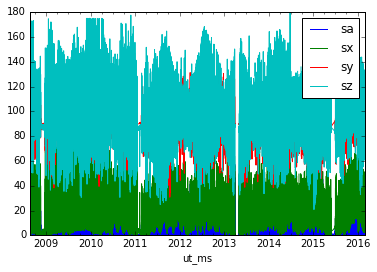

In [21]:
df_saaf.resample('h').mean().plot()

In [22]:
df_saaf_h = df_saaf.resample('h').mean()

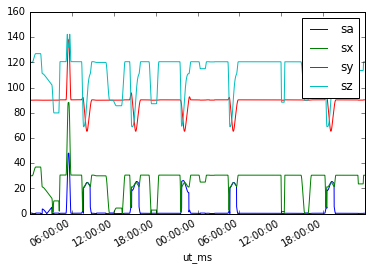

In [30]:
df_saaf["2010-06-16":"2010-06-17"].plot()

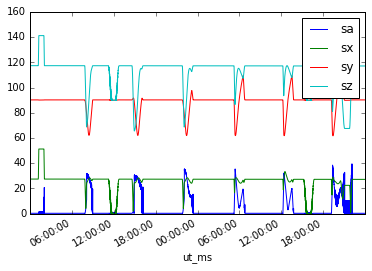

In [32]:
df_saaf["2010-07-16":"2010-07-17"].plot()

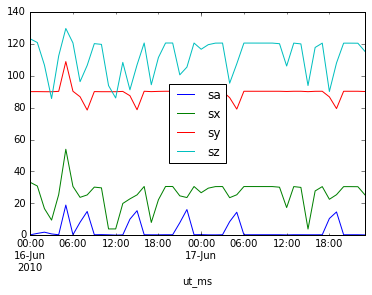

In [31]:
df_saaf_h["2010-06-16":"2010-06-17"].plot()

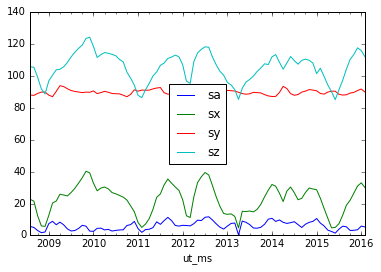

In [35]:
df_saaf_h.resample('M').mean().plot()

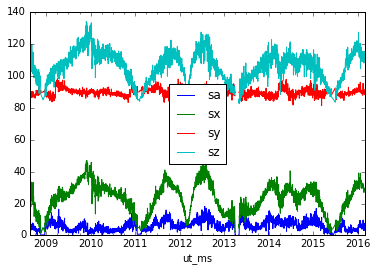

In [34]:
df_saaf_h.resample('d').mean().plot()

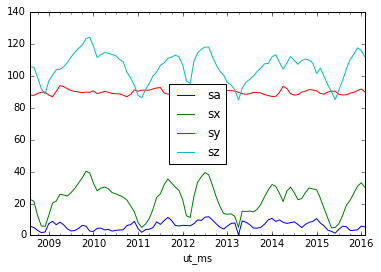

In [36]:
df_saaf_h.resample('d').mean().resample('M').mean().plot()